<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS 2 - Erick Watt-Udogu

In this problem set, I decided to look at three new datasets.

The African American population data is completely academic. I am interested in doing some exploratory data analysis of African Americans as a potential method for my dissertation. This dataset was read in from HTML.

The second dataset is one I received in support of my work. This data includes preliminary results of a digital advertising campaign targeting southern New Jersey with the goal of increasing awareness of graduate school programs in this important region. I needed to process this data to make strategic decisions about this campaign as it enters its final month. I requested and received this data in a CSV format.

I chose the final dataset because it sparked my interest both academically and professionally. Academically, I used this dataset previously in a GIS class, but I only used the geometry fields. However, I recalled that it also contained population data and economic indices. I am interested in manipulating this data more, but doing so did not align with my research question in that class. Professionally, I am interested in learning more about the region of the world where we receive so many students—Asia broadly, and South Asia in particular. I don't know much about this geographic region, and the SHP file allows me to learn about the physical locations and quantitative data simultaneously.

# Setup Code

I was more deliberate about the setup code than normal. Instead of dumping old code and hoping from the best, now that I have done this for the third class it makes more sense.  

In [47]:
#Using code from previous projects and Dr. Adam
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

%matplotlib inline

import pandas as pd
import urllib.request
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

!pip install geopandas==1.0.1
!pip install mapclassify
import geopandas as gpd

import time, webbrowser, zipfile

from google.colab import data_table
data_table.enable_dataframe_formatter()

import plotly.express as px
import plotly.graph_objects as go

!pip install ydata-profiling
from ydata_profiling import ProfileReport

# Importing and Manipulating Files

## List of U.S. states and territories by African-American population (HTML)

Source: Wikipedia https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

In the wake of the murder of Michael Brown by Ferguson, Missouri police officer Darren Wilson, I have been fascinated with the question of African American geographic data. I was astonished that when the killing occurred in 2014, the majority-Black district did not have a single Black person in municipal leadership. This seemed odd to me, but upon further review, I noticed that states with the highest African American populations often did not have African Americans elected statewide. Furthermore, many of these states were in the southern United States—an area known to be politically conservative. This was interesting to me, and this data read helps me examine this data in greater detail.

### Import African American Population Data

I chose the timeseries data from Wikipedia because it would offer some interesting insights, the alternative was aggregate data for 2020.

In [61]:
aapop = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population',match="State/Territory")[0].head(65)
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


### Manipulating African American Population Data

In [62]:
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


In [63]:
#All objects. I am going to have to turn all these into numbers.
aapop.dtypes

,0
State/Territory,object
1790,object
1800,object
1810,object
1820,object
1830,object
1840,object
1850,object
1860,object
1870,object


In [64]:
#I wasn't planning on updating all the years, but the AI made it easy. It seems to anticipate that I wanted to change it.
aapop['1790'] = aapop['1790'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1800'] = aapop['1800'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1810'] = aapop['1810'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1820'] = aapop['1820'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1830'] = aapop['1830'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1840'] = aapop['1840'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1850'] = aapop['1850'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1860'] = aapop['1860'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1870'] = aapop['1870'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1880'] = aapop['1880'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1890'] = aapop['1890'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1900'] = aapop['1900'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1910'] = aapop['1910'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1920'] = aapop['1920'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1930'] = aapop['1930'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1940'] = aapop['1940'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1950'] = aapop['1950'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1960'] = aapop['1960'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1970'] = aapop['1970'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1980'] = aapop['1980'].str.replace('[\%]', '', regex=True).astype(float)
aapop['1990'] = aapop['1990'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2000'] = aapop['2000'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2010'] = aapop['2010'].str.replace('[\%]', '', regex=True).astype(float)
aapop['2020'] = aapop['2020'].str.replace('[\%]', '', regex=True).astype(float)

In [65]:
aapop.describe()

,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
count,19.000000,26.000000,29.000000,30.000000,31.000000,32.000000,38.000000,45.000000,49.000000,49.000000,...,52.000000,52.000000,51.000000,52.000000,52.000000,52.000000,56.000000,57.000000,57.000000,53.000000
mean,15.352632,16.534615,18.372414,17.683333,19.345161,18.687500,15.992105,13.171111,12.526531,12.571429,...,9.496154,9.253846,9.374510,9.728846,10.021154,10.365385,11.315536,12.007193,12.637018,12.771698
std,14.957806,15.993872,17.620299,17.930807,19.389737,19.595008,18.826640,18.269306,18.141318,18.416354,...,13.434999,12.874621,11.839068,11.991375,12.524444,12.395586,14.720913,14.392811,13.805798,10.193218
min,0.300000,0.400000,0.300000,0.300000,0.200000,0.200000,0.000000,0.000000,0.100000,0.200000,...,0.100000,0.000000,0.000000,0.100000,0.200000,0.200000,0.020000,0.040000,0.020000,1.200000
25%,2.350000,2.950000,2.900000,2.200000,1.650000,1.075000,0.600000,0.300000,0.600000,0.500000,...,0.400000,0.400000,0.850000,1.525000,1.750000,1.800000,2.150000,2.500000,2.900000,5.000000
50%,9.500000,8.900000,13.000000,11.900000,15.500000,12.600000,3.700000,1.600000,1.800000,1.900000,...,3.400000,3.600000,4.400000,5.200000,6.350000,6.900000,6.850000,7.500000,8.700000,9.700000
75%,24.200000,30.150000,32.200000,32.700000,35.400000,33.125000,27.275000,24.900000,22.500000,22.500000,...,13.950000,13.725000,13.200000,12.700000,13.175000,14.025000,15.075000,15.600000,16.100000,17.200000
max,43.700000,44.600000,55.200000,52.800000,58.500000,56.400000,58.900000,58.600000,58.900000,60.700000,...,50.200000,49.200000,45.300000,53.900000,71.100000,70.300000,76.620000,76.190000,76.030000,44.200000


<Axes: >

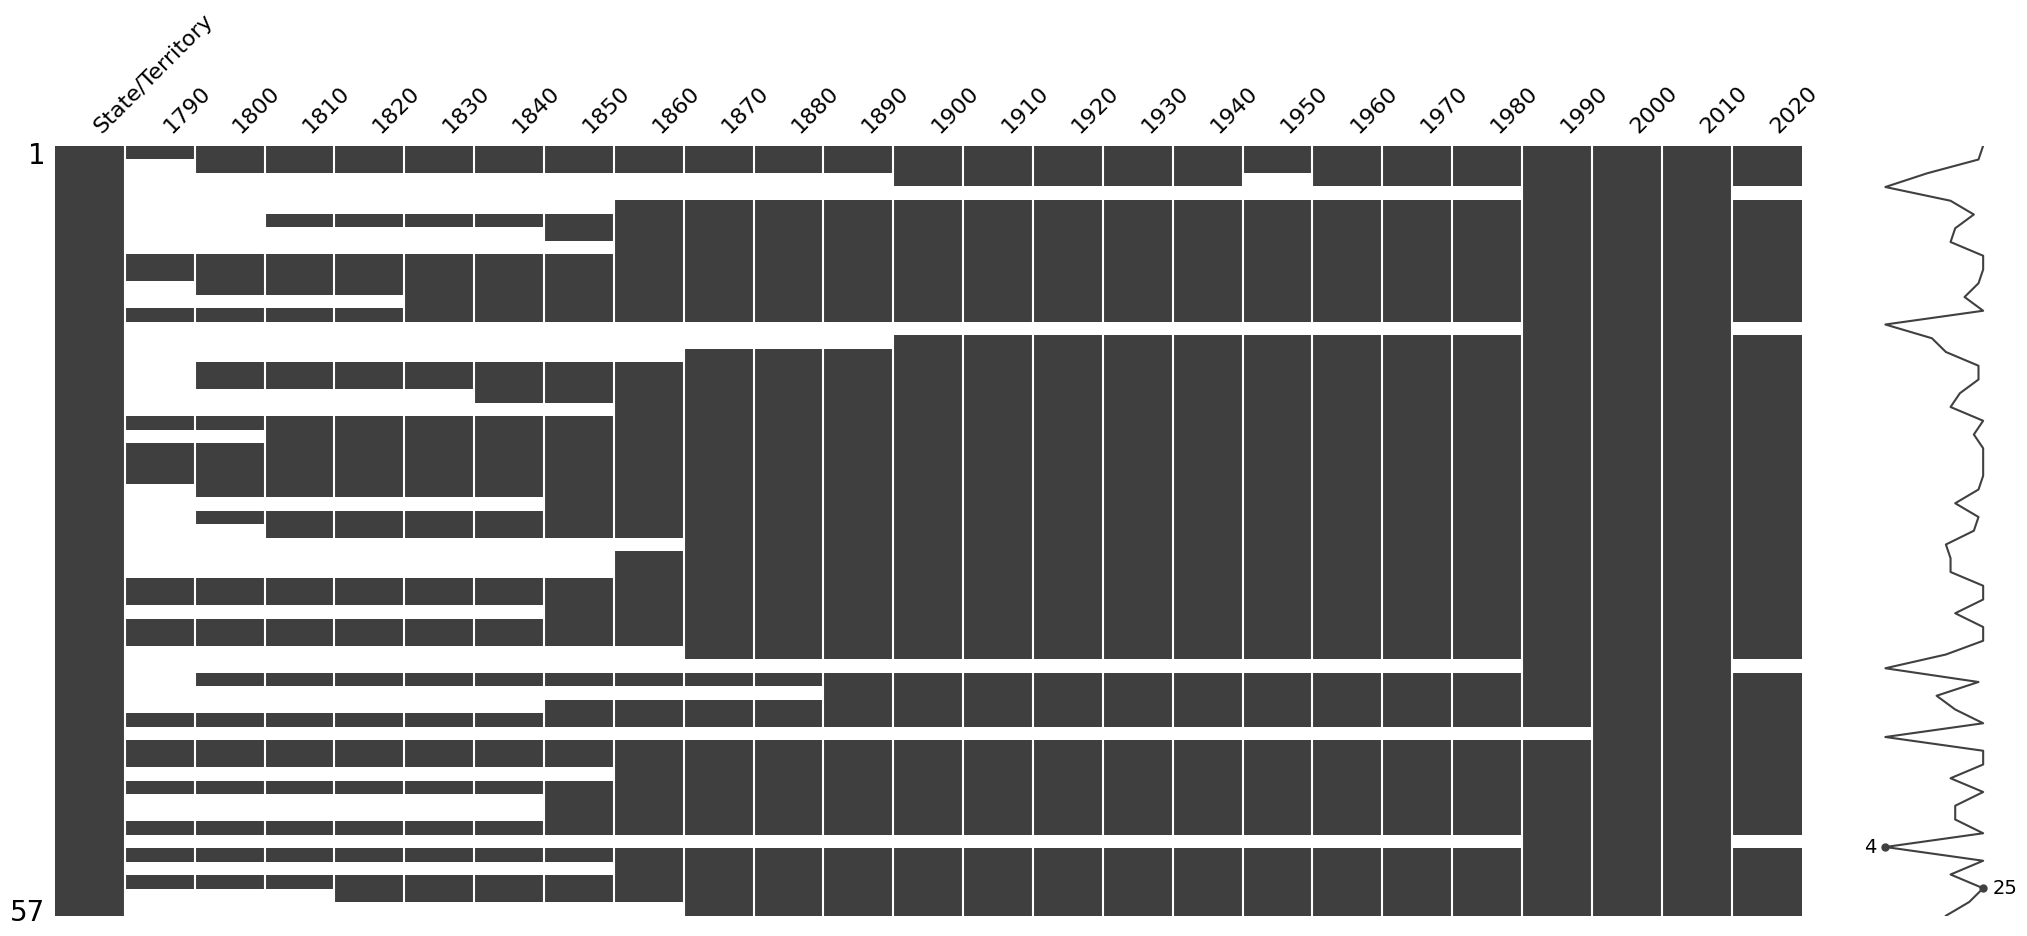

In [66]:
#This all makes sense. I hypothesize that the missing data is related to when statehood was granted. I think I might just pull 2010 and 2020
msno.matrix(aapop)

In [67]:
#I want just United States aapop
usaapop = aapop[aapop['State/Territory'] == 'United States of America']

In [68]:
#I want to create a line graph so of USAAPOP so I need to stack it
usaapop = usaapop.melt(id_vars=['State/Territory'], var_name='Year', value_name='Percentage')

In [69]:
usaapop.head(5)

,State/Territory,Year,Percentage
0,United States of America,1790,19.3
1,United States of America,1800,18.9
2,United States of America,1810,19.0
3,United States of America,1820,18.4
4,United States of America,1830,18.1


***US African American Population Percentage Over Time***

This data is interesting. After I controlled for the US, it is interesting to relationship between time and African American population percentage is quadrati. I did not know that before running this data. I thought the percentage was in a steady decline, especially with increased immigration, but that is not the case.

In [70]:
fig = px.line(usaapop, x="Year", y="Percentage")
fig.show()

In [71]:
# In aapop I want to remove United States, it is the aggregate
aapop = aapop[aapop['State/Territory'] != 'United States of America']

In [72]:
# It's too busy. I want parsimony. Let's just look at 2020, 1980, 1940, 1900, 1860, 1820 in ascending order
simpleaapop = aapop[['State/Territory', '2020', '1980', '1940', '1900', '1860', '1820']]

***US State and Territory African American Population Over Time ***

I wanted to disaggregate the data a bit and see how things changed over time. What's interesting and what I think needs more analysis is that other than DC and Delaware many of the current states with the highest African American population percentage tend to be in states that are politically conservative. I was also surprised by California, that number looks low.

In [73]:
#I can't get rid of all those digits to the right of the decimal.
simpleaapop.round(2).style.background_gradient(cmap="coolwarm")

,State/Territory,2020,1980,1940,1900,1860,1820
1,Alabama,26.800000,25.600000,34.700000,45.200000,45.400000,33.200000
2,Alaska,4.800000,3.400000,0.200000,0.300000,nan,nan
3,American Samoa,nan,nan,nan,nan,nan,nan
4,Arizona,6.200000,2.800000,3.000000,1.500000,0.300000,nan
5,Arkansas,16.500000,16.300000,24.800000,28.000000,25.600000,11.700000
6,California,7.100000,7.700000,1.800000,0.700000,1.100000,nan
7,Colorado,5.500000,3.500000,1.100000,1.600000,0.100000,nan
8,Connecticut,13.000000,7.000000,1.900000,1.700000,1.900000,2.900000
9,Delaware,24.700000,16.100000,13.500000,16.600000,19.300000,24.000000
10,District of Columbia,44.200000,70.300000,28.200000,31.100000,19.100000,31.200000


In [74]:
#I want to know which State/Territories had the top 10 highest percentages in 2020 and create a dataframe of just those
top10aapop = aapop.nlargest(10, '2020')
top10aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
10,District of Columbia,NaN,30.4,33.1,31.2,30.1,29.1,26.6,19.1,33.0,...,27.1,28.2,35.0,53.9,71.1,70.3,65.8,61.3,52.2,44.2
27,Mississippi,NaN,41.5,47.0,44.1,48.4,52.3,51.2,55.3,53.7,...,50.2,49.2,45.3,42.0,36.8,35.2,35.6,36.6,37.6,37.9
21,Louisiana,NaN,NaN,55.2,51.8,58.5,55.0,50.7,49.5,50.1,...,36.9,35.9,32.9,31.9,29.8,29.4,30.8,32.9,32.8,33.1
12,Georgia,35.9,37.1,42.5,44.4,42.6,41.0,42.4,44.0,46.0,...,36.8,34.7,30.9,28.5,25.9,26.8,27.0,29.2,31.5,33.0
23,Maryland,34.7,36.7,38.2,36.1,34.9,32.3,28.3,24.9,22.5,...,16.9,16.6,16.5,16.7,17.8,22.7,24.9,28.8,30.9,32.0


In [75]:
#I need to stack top10aapop so I can make a line graph. I don't want all 50 states.
top10aapop = top10aapop.melt(id_vars=['State/Territory'], var_name='Year', value_name='Percentage')

In [76]:
top10aapop.head(5)

,State/Territory,Year,Percentage
0,District of Columbia,1790,NaN
1,Mississippi,1790,NaN
2,Louisiana,1790,NaN
3,Georgia,1790,35.9
4,Maryland,1790,34.7


In [77]:
# I need to remove '1790 Rank', '2020 Rank' and 'Region' from in the Percentage column
top10aapop = top10aapop[top10aapop['Year'] != '1790 Rank']
top10aapop = top10aapop[top10aapop['Year'] != '2020 Rank']
top10aapop = top10aapop[top10aapop['Year'] != 'Region']

**Top 10 States and Territories of African American Population Percentage**

This is almost a spaghetti chart, but I like plotly's interactivity to help me look at the data. DC is fascinating As is Louisiana. It amazing that some of these states had Black populations of greater than 50% around the Civil War with many of them coprising of more than half.

In [78]:
# I need to move the legend so it doesn't obscure the data on the right
fig = px.line(top10aapop, x="Year", y="Percentage",color="State/Territory")
fig.update_layout(legend=dict(yanchor="top",xanchor="left"))
fig.show()


## African American Prison Percentages by State

Source: https://www.prisonpolicy.org/blog/2023/09/27/updated_race_data/

Importing African American

In [79]:
aaprison = pd.read_excel('https://www.prisonpolicy.org/data/race_bystate_2021.xlsx', sheet_name='Percentages', skiprows=3, usecols='A,G')
aaprison.head(5)

,State,Black (non-Hispanic)
0,Alabama,0.533437
1,Alaska,0.100237
2,Arizona,0.149997
3,Arkansas,0.397779
4,California,0.283022


In [80]:
#Looks good. I only imported what was necessary, so this was easy.
aaprison.dtypes

,0
State,object
Black (non-Hispanic),float64


The percentage of Black people in the United states in 2020 was 13% but the mean of the Black population incarcerated in 2021 was nearly three times that. Another number that is astonishing is that there is a state with a Black prison population of more than 70%, but the violin plot shows that there are five states with prison populations of more than 60%. The 75th percentile is almost 50%.

When I list the states with prison populations greater than 60% I was surprised to see the political left leaning states including New Jersey, Delaware and Maryland.

In [81]:
#I want a list of all the states in aapop where the percentage is more than .60
aaprison[aaprison['Black (non-Hispanic)'] > .60]

,State,Black (non-Hispanic)
7,Delaware,0.613721
18,Louisiana,0.655711
20,Maryland,0.709000
24,Mississippi,0.614413
30,New Jersey,0.612666


In [82]:
#Only 50 observations, so probably no DC and definitely no territories. DC is a loss since it has such a high Black population. Territories, not so much.
aaprison.describe()

,Black (non-Hispanic)
count,50.000000
mean,0.317464
std,0.198303
min,0.026895
25%,0.117305
50%,0.297669
75%,0.488053
max,0.709000


In [83]:
fig = px.violin(aaprison, y="Black (non-Hispanic)", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
               )
fig.show()

### Merge African American Population with African American Prison Data

In [84]:
#First I need the aapop data to include just state and 2020.
aapop2020 = simpleaapop[['State/Territory', '2020']]
aapop2020.head()

,State/Territory,2020
1,Alabama,26.8
2,Alaska,4.8
3,American Samoa,NaN
4,Arizona,6.2
5,Arkansas,16.5


In [85]:
#I need to get aapop2020 ready to merge. I want to rename State/Terrirory to State and 2020 to Pop.
aapop2020 = aapop2020.rename(columns={'State/Territory': 'State', '2020': 'Pop'})
aapop2020.head()

,State,Pop
1,Alabama,26.8
2,Alaska,4.8
3,American Samoa,NaN
4,Arizona,6.2
5,Arkansas,16.5


In [86]:
#Now I want to rename Black (non-Hispanic) in aaprison to Prison
aaprisonmerge = aaprison.rename(columns={'Black (non-Hispanic)': 'Prison'})
aaprisonmerge.head()

,State,Prison
0,Alabama,0.533437
1,Alaska,0.100237
2,Arizona,0.149997
3,Arkansas,0.397779
4,California,0.283022


In [87]:
#I want to merge aaprisonmerge and aapop2020 on outer with State as the common field.
aapopprison = pd.merge(aaprisonmerge, aapop2020, on='State', how='outer',indicator=True)
aapopprison.head(5)

,State,Prison,Pop,_merge
0,Alabama,0.533437,26.8,both
1,Alaska,0.100237,4.8,both
2,American Samoa,NaN,NaN,right_only
3,Arizona,0.149997,6.2,both
4,Arkansas,0.397779,16.5,both


In [88]:
#Prison aapopprison needs to be multiplied by 100 and rounded to one decimal place.
aapopprison['Prison'] = aapopprison['Prison'] * 100
aapopprison['Prison'] = aapopprison['Prison'].round(1)
aapopprison.head(5)

,State,Prison,Pop,_merge
0,Alabama,53.3,26.8,both
1,Alaska,10.0,4.8,both
2,American Samoa,NaN,NaN,right_only
3,Arizona,15.0,6.2,both
4,Arkansas,39.8,16.5,both


In [89]:
#I want to know the correlation coefficient in aapopprison of Prison and Pop
aapopprison['Prison'].corr(aapopprison['Pop'])

0.9103411904187235

In [90]:
# In aapopprison I want to create a scatterplot that plots prison against pop
scatter = px.scatter(aapopprison, x="Pop", y="Prison", color="State")
scatter.show()

In [104]:
#In aapopprison I want to add a column that subtracts Pop from Prison and another that divides the difference of prison and pop over pop.
aapopprison['Difference'] = aapopprison['Prison'] - aapopprison['Pop']
aapopprison['Difference/Pop'] = aapopprison['Difference'] / aapopprison['Pop']
aapopprison.head(5)

,State,Prison,Pop,_merge,Difference,Difference/Pop
0,Alabama,53.3,26.8,both,26.5,0.988806
1,Alaska,10.0,4.8,both,5.2,1.083333
2,American Samoa,NaN,NaN,right_only,NaN,NaN
3,Arizona,15.0,6.2,both,8.8,1.419355
4,Arkansas,39.8,16.5,both,23.3,1.412121


In [105]:
scatter = px.scatter(aapopprison, x="Pop", y="Difference", color="State")
scatter.show()

In [111]:
scatter = px.scatter(aapopprison, x="Pop", y="Difference/Pop", color="State")
scatter.show()

In [108]:
aapopprison.describe().round(2)

,Prison,Pop,Difference,Difference/Pop
count,50.00,52.00,50.00,50.00
mean,31.75,12.74,19.73,1.90
std,19.83,10.29,11.90,0.83
min,2.70,1.20,1.30,0.41
25%,11.72,4.95,8.45,1.33
50%,29.75,9.70,19.90,1.75
75%,48.80,17.23,29.33,2.30
max,70.90,44.20,46.10,4.27


## Graduate School Geofence Campaign Data (CSV)

Source: Provided by LocalIQ the Geofence Vendor

Geofencing is a digital marketing strategy that allows advertisers to send advertisements to specific locations during a particular time. Often, this is used to send advertisements to people who visit a mall, concert, or sporting event to direct them to area bars or eateries, but it is also used in higher education marketing to target people who work or live in a particular area.

Beginning in January of this year, the Graduate School began such a campaign targeting Camden, Trenton, and local universities, namely Rowan and Stockton. The dataset contains some results from this campaign. The vendor presented some of this data to me as a table during a presentation, but I couldn't glean any insight from the presentation, so I asked for the raw data. This part of the problem set is where I review that data.

### Importing Geofence Data

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/datamanagement/refs/heads/main/Geofence%20Report%20With%20Creatives.csv", "Geofence.csv")
Geofence = pd.read_csv('Geofence.csv')
Geofence.head(5)

### Manipulating Geofence Data

In [ ]:
Geofence.head(5)

In [ ]:
#All the percentage data needs to be converted from object, but under the "work smarer not harder" maxim, I am going to choose some of the variables to convert.
Geofence.dtypes

In [ ]:
#I had to use Gemini to help me get rid of the "$"
Geofence['Spend'] = Geofence['Spend'].str.replace('[\$,]', '', regex=True).astype(float)

In [ ]:
#I was able to do clickthrough rate myself.
Geofence['CTR'] = Geofence['CTR'].str.replace('[\%,]', '', regex=True).astype(float)

In [ ]:
msno.matrix(Geofence)

In [ ]:
Geofence.describe()

In [ ]:
#Walk-ins column is not needed and there is nothing in it. So I am going to drop it.
Geofence = Geofence.drop(columns=['Walk-ins'])

In [ ]:
#I want to make the geofences meaningful, now they are a bunch of addresses. First I am going to see what I have.
#I organized these around Camden Area, NJGov and Colleges and Universities. I think that will simplify a bit.
print(Geofence.Geofences.unique())

In [ ]:
mapped_places = {
    "Camden Waterfront District\t1 Riverside Drive\tCamden\tNJ\t08103": "Camden Area",
    "Rowan University\t201 Mullica Hill Road\tGlassboro\tNJ\t08028": "Colleges and Universities",
    "New Jersey Department of Environmental Protection\t401 East State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Human Services\t222 South Warren Street\tTrenton\tNJ\t00860": "NJGov",
    "New Jersey Department of Labor & Workforce Development\t1 John Fitch Plaza\tTrenton\tNJ\t08611": "NJGov",
    "Rider University\t2083 Lawrenceville Road\tLawrenceville\tNJ\t08648": "Colleges and Universities",
    "Lockheed Martin\t199 Borton Landing Road\tMoorestown\tNJ\t08057": "Camden Area",
    "Camden City Hall\t520 Market Street\tCamden\tNJ\t08102": "Camden Area",
    "Stockton University\t101 Vera King Farris Drive\tGalloway\tNJ\t08205": "Colleges and Universities",
    "The College of New Jersey\t2000 Pennington Road\tEwing\tNJ\t08628": "Colleges and Universities",
    "New Jersey Department of the Treasury\t50 West State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Children and Families\t50 East State Street\tTrenton\tNJ\t08608": "NJGov",
    "New Jersey Department of Banking and Insurance\t20 West State Street\tTrenton\tNJ\t08608": "NJGov"
}

Geofence["Categories"] = Geofence["Geofences"].map(mapped_places)
Geofence.head(5)

I like this report a great deal. Since the data is simple, I can learn some of what I found in the specific plots and analysis, but this puts it all in one place.

In [ ]:
ProfileReport(Geofence)

Seeing the data in groups was helpful, but only to a point. I see that College and University Impressions were high but so was the spend. Largely what this tells me is that they did not spread the budget across the fenced areas, likely because the Rowan fence had a high click rate.

In [ ]:
Geofence[['Categories','Impressions', 'Clicks','CTR','Spend']].groupby('Categories').agg(['mean', 'min','max','std','skew']).round(2)

Seeing the data this was was helpful to see that there were duplicates. I have requested another file.

In [ ]:
#The Geofences are duplicated. This could be because we are running two different ad treatments or it could be a mistake. I have written to the vendor for clarification.
fig = px.scatter(Geofence, x="CTR", y="Clicks",
                 symbol='Categories', color="Spend",
                 size="Impressions", hover_data=['Geofences'],width=1000,height=750,
                 color_continuous_scale=px.colors.sequential.Turbo)
fig.update_layout(legend=dict(yanchor="top",xanchor="right"),
    title_text = 'Comparing Geofence Impressions, Clicks, and Spend Across Categories')

I can see here the perfect correlation between many of these variables suggests that this is not a good test. I need to control for Rowan to determine the success of the test. I am actually going to take Rowan out and look at the data further. It might not be so perfectly correlated, but I dont like the size of the "n."

In [ ]:
#I like this plot better, but I would not have noticed my duplicate issue without the plot above.
sns.pairplot(Geofence)

In [ ]:
correlation_table = Geofence[['Impressions', 'CTR', 'Clicks','Spend']].corr().round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## World Countries (SHP)

Source: World Bank https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip

This is a piece of data I used sparingly during the GIS class. I always wanted to learn more about the details in this file and noticed a great deal of useful and interesting data. This part of the project is an extension of that GIS project but also helps me learn more about a part of the world that is increasingly important to my professional work.

### Importing World Country Data

In [ ]:
! wget -q -O Countries.zip https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip
zip_ref = zipfile.ZipFile('Countries.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')
Countries.head(5)

### Manipulating World Country Data

In [ ]:
Countries.dtypes

In [ ]:
Countries.describe()

In [ ]:
msno.matrix(Countries)

In [ ]:
#I am going to use Continent and Subregion to subset the data.
print(Countries.CONTINENT.unique())
print(Countries.REGION_UN.unique())
print(Countries.SUBREGION.unique())
print(Countries.REGION_WB.unique())
print(Countries.ECONOMY.unique())

This was really interesting data to see where the population and GDP was concentrated by continent. I am not sure it was surprising as much as it was interesting.

In [ ]:
Countries[['CONTINENT','POP_EST', 'GDP_MD_EST']].groupby('CONTINENT').agg(['mean', 'min','max']).round(2)

In [ ]:
asia = Countries[Countries['CONTINENT'] == 'Asia']

I like being able to review the data by region. But the numbers in this were not as helpful, so I decided to map the data.

In [ ]:
asia[['SUBREGION','POP_EST', 'GDP_MD_EST']].groupby('SUBREGION').agg(['mean', 'min','max']).round(2)

In [ ]:
fig, ax = plt.subplots(1, figsize=(25, 50))
asia.plot(ax=ax, column='POP_EST', legend=True, cmap='coolwarm',
                scheme='natural_breaks', k=7, edgecolor='grey', linewidth=.1,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})

#Title
ax.text(0, 60, "Populations in Asia", fontsize=24, color='Black', fontweight='bold', ha='left')

#Remove the border/spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Remove the x & y ticks
ax.set_xticks([])
ax.set_yticks([])

#Add Country names. I want to remove some of the fields from the data but a lot of it is useful. I tried "FORMAL_EN" and it was only after a couple of tries that I found a field that liked.
for idx, row in asia.iterrows():
    ax.annotate(text=row['NAME_EN'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=9, color='black')

In [ ]:
fig, ax = plt.subplots(1, figsize=(25, 50))
asia.plot(ax=ax, column='GDP_MD_EST', legend=True, cmap='coolwarm',
                scheme='natural_breaks', k=7, edgecolor='grey', linewidth=.1,
                legend_kwds={"fmt": "{:,.0f}", 'loc': 'lower right', 'markerscale': 1.4})

#Title
ax.text(0, 60, "GDP in Asia", fontsize=24, color='Black', fontweight='bold', ha='left')

#Remove the border/spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#Remove the x & y ticks
ax.set_xticks([])
ax.set_yticks([])

#Add Country names. I want to remove some of the fields from the data but a lot of it is useful. I tried "FORMAL_EN" and it was only after a couple of tries that I found a field that liked.
for idx, row in asia.iterrows():
    ax.annotate(text=row['NAME_EN'], xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                horizontalalignment='center', fontsize=9, color='black')

The maps above were helpful to see geography, population and GDP. But the treemap helps me to see all their relationships together. I am particularly interested in the South Asia since that is where so many students are from. I did not know the region outside India was so populated. (It's important to note that this data is from 2016, before India became the world's most poulace nation). Bangladesh is so fascinating to me, I didn't know it was so populated or had a relatively high GDP.

In [ ]:
fig = px.treemap(asia, path=[px.Constant("Asia"), 'SUBREGION', 'NAME_EN'], values='POP_EST',
                  color='GDP_MD_EST', hover_data=['NAME_EN'],
                  color_continuous_scale='RdBu_r',
                  color_continuous_midpoint=np.average(asia['GDP_MD_EST'], weights=asia['POP_EST']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

The fact that GDP and Population are so highly correlated is intersting. In future work, I want to compare other continents and economic structures. I am not sure the relationship will always be so tight.

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(asia['POP_EST'], asia['GDP_MD_EST'], alpha=0.7, edgecolors='k')

# Labels and title
plt.xlabel('Population Estimate')
plt.ylabel('GDP Estimate (Million $)')
plt.title('Population vs. GDP for Asian Countries')

plt.xscale('log')
plt.yscale('log')
plt.show()

## United States (SHP)

### Importing Unted States SHP

My plan here is to merge this data with the African American Population Data since I have states and Territories, so now I can visualize the population data against political boundaries.

In [ ]:
! wget -q -O US.zip https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

zip_ref = zipfile.ZipFile('US.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

NJ

In [ ]:
import plotly.graph_objects as go
from plotly import data

import pandas as pd

df = data.gapminder()
df = df.loc[(df.continent == "Europe") & (df.year.isin([1952, 2002]))]

countries = (
    df.loc[(df.continent == "Europe") & (df.year.isin([2002]))]
    .sort_values(by=["lifeExp"], ascending=True)["country"]
    .unique()
)

data = {"line_x": [], "line_y": [], "1952": [], "2002": [], "colors": [], "years": [], "countries": []}

for country in countries:
    data["1952"].extend([df.loc[(df.year == 1952) & (df.country == country)]["lifeExp"].values[0]])
    data["2002"].extend([df.loc[(df.year == 2002) & (df.country == country)]["lifeExp"].values[0]])
    data["line_x"].extend(
        [
            df.loc[(df.year == 1952) & (df.country == country)]["lifeExp"].values[0],
            df.loc[(df.year == 2002) & (df.country == country)]["lifeExp"].values[0],
            None,
        ]
    )
    data["line_y"].extend([country, country, None]),

fig = go.Figure(
    data=[
        go.Scatter(
            x=data["line_x"],
            y=data["line_y"],
            mode="lines",
            showlegend=False,
            marker=dict(
                color="grey"
            )
        ),
        go.Scatter(
            x=data["1952"],
            y=countries,
            mode="markers",
            name="1952",
            marker=dict(
                color="green",
                size=10
            )

        ),
        go.Scatter(
            x=data["2002"],
            y=countries,
            mode="markers",
            name="2002",
            marker=dict(
                color="blue",
                size=10
            )
        ),
    ]
)

fig.update_layout(
    title=dict(text="Life Expectancy in Europe: 1952 and 2002"),
    height=1000,
    legend_itemclick=False
)

fig.show()

In [ ]:
df.head()